In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [3]:
dataf = pd.read_csv('merged_data_ceramic.csv')

In [4]:
dataf

rho           E        mu  r  h        f1        f2  \
0        2393.886000  673.880000  0.155000  1  4  0.000000  0.000000   
1        2671.475000  743.424000  0.155000  1  4  0.000000  0.000000   
2        2538.534056  709.810101  0.168605  1  4  0.000000  0.000000   
3        2602.197717  704.734719  0.155728  1  4  0.000000  0.000000   
4        2410.553152  664.734190  0.197541  1  4  0.000000  0.000000   
...              ...         ...       ... .. ..       ...       ...   
169790   6502.678000  277.514000  0.353000  6  5  0.961076  0.961788   
169791   4215.544000  342.211000  0.236000  6  5  0.918013  0.918015   
169792  15752.804000  782.770000  0.197000  6  5  0.954050  0.954052   
169793   9052.711000  804.345000  0.215000  6  5  0.901245  0.901245   
169794   5207.655000  601.121000  0.228000  6  5  0.887750  0.887750   

              f3        f4        f5  ...       f21       f22       f23  \
0       0.000000  0.000000  0.000000  ...  2.433014  2.433014  2.433020   
1       0.000000  0.000000  0.000000  ...  2.418970  2.418970  2.418976   
2       0.000000  0.000000  0.000000  ...  2.418975  2.418975  2.418981   
3       0.000000  0.000000  0.000000  ...  2.386033  2.386033  2.386038   
4       0.000000  0.000000  0.000000  ...  2.389966  2.389966  2.389972   
...          ...       ...       ...  ...       ...       ...       ...   
169790  0.961789  0.971480  0.971481  ...  1.016521  1.016529  1.026399   
169791  0.918334  0.918335  0.924123  ...  1.040315  1.040315  1.051571   
169792  0.959670  0.959671  0.959703  ...  1.013016  1.016889  1.017267   
169793  0.902564  0.902565  0.917703  ...  1.021873  1.023274  1.023275   
169794  0.933773  0.933773  0.933922  ...  1.061679  1.061680  1.080731   

             f24       f25       f26       f27       f28       f29       f30  
0       2.433020  2.760253  2.760253  3.598912  3.598912  3.598930  3.598930  
1       2.418976  2.744158  2.744158  3.578071  3.578071  3.578090  3.578090  
2       2.418981  2.734676  2.734676  3.574128  3.574128  3.574146  3.574146  
3       2.386038  2.706297  2.706297  3.529149  3.529149  3.529167  3.529167  
4       2.389972  2.682763  2.682763  3.522830  3.522830  3.522847  3.522847  
...          ...       ...       ...       ...       ...       ...       ...  
169790  1.026406  1.034641  1.034649  1.035174  1.035175  1.036663  1.036663  
169791  1.051571  1.052877  1.052877  1.060247  1.060251  1.065100  1.065101  
169792  1.024941  1.024941  1.037973  1.037973  1.043442  1.043442  1.049717  
169793  1.044103  1.044104  1.045423  1.050671  1.050673  1.090386  1.090386  
169794  1.080733  1.096304  1.096305  1.096862  1.096864  1.100479  1.100479  

[169795 rows x 35 columns]

In [5]:
X = dataf[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_split=0.1)

Epoch 1/1500


C:\Users\Ayush Rai\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9456/9456 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 685792.5625 - val_loss: 377156.0625
Epoch 2/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 383287.0312 - val_loss: 391544.7500
Epoch 3/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 374961.2812 - val_loss: 357845.8750
Epoch 4/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 354289.1562 - val_loss: 335687.3750
Epoch 5/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 320387.8125 - val_loss: 294110.9375
Epoch 6/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 293275.6562 - val_loss: 275368.0312
Epoch 7/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 274424.0000 - val_loss: 271651.4688
Epoch 8/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 262011.1250 - val_loss: 254833.0312
Epoch 9/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 248293.5625 - val_loss: 243793.4531
Epoch 10/1500
9456/9456 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 240423.6406 - val_loss: 236188.9531
Ep

In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import pickle

In [ ]:
model_file_pickle = "Ceramics_ANN_model_NU_scaled.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load the model from the file
model_file_pickle1= "Ceramics_ANN_model_NU_scaled.pkl"
with open(model_file_pickle1, 'rb') as file:
    model = pickle.load(file)

In [23]:
y_pred1 = model.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred1[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred1[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred1[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred1[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred1[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred1[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error for E: 1549.2504343138182
Mean Squared Error for mu: 127972.36489512012
Median Percentage Error for E: 4.17834558624622
Median Percentage Error for mu: 1.925104815533877
Mean Absolute Error for E: 28.592482090236157
Mean Absolute Error for mu: 0.01805160732321343
Standard Deviation for E: 27.05829977869091
Standard Deviation for mu: 0.030893772995113495
Mode Percentage Error for E: ModeResult(mode=0.0017588672408219662, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.00019073486328125, count=1) 
Mean Absolute percentage Error for E: 7.252917767528518
Mean Absolute percentage Error for mu: 6.7886480652263534
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      629.500   593.823730  35.676270      0.220      0.212262  0.007738   
1      735.530   718.851196  16.678804      0.420      0.401061  0.018939   
2      497.970   477.248596  20.721404      0.161      0.316464  0.155464   
3      305

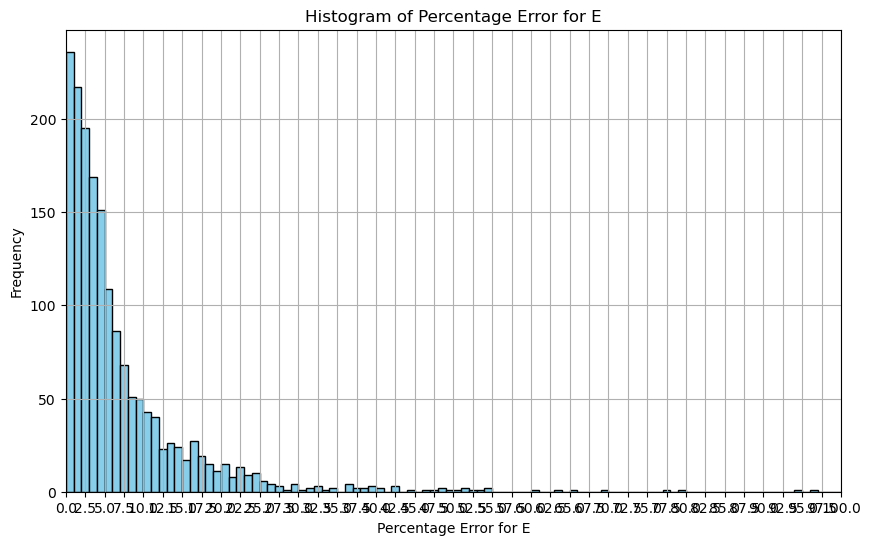

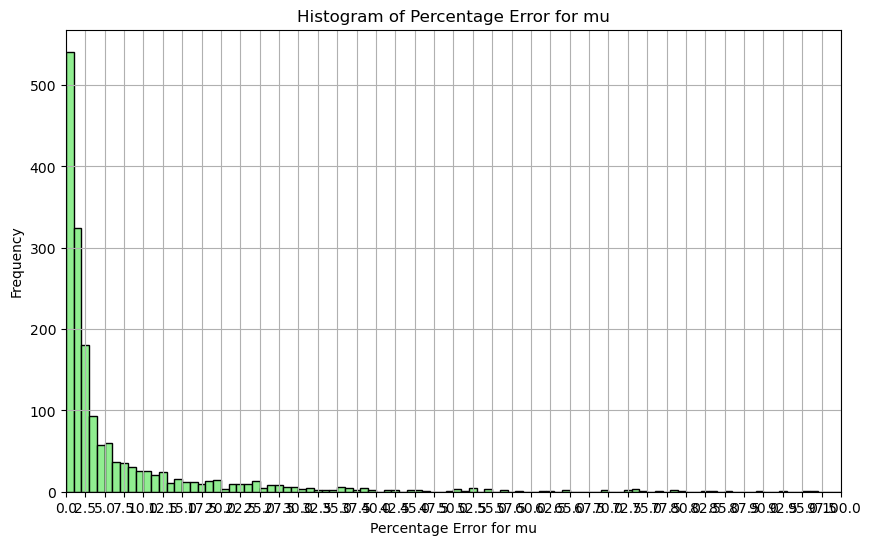

Maximum Percentage Error for E: 129.688527073167
Minimum Percentage Error for E: 0.0017588672408219662
Maximum Percentage Error for mu: 135.4685572574013
Minimum Percentage Error for mu: 0.00019073486328125


In [25]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')